In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sdv.tabular import CopulaGAN
from sdv.tabular import TVAE
from sdv.tabular import GaussianCopula
from sdv.tabular import CTGAN
from sdv.evaluation import evaluate

from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split

# Function for reshaping data after power transformation
def reshape_after_pt(df_pt, df): 
    df_pt = pd.DataFrame(df_pt, columns=
                             df.columns)
    df_pt.index = df.index
    return df_pt

In [2]:
df = pd.read_csv('allregimes.csv')
df = df[['N','xm','nr','ni','p1','p2','p3']]
df.loc[:, "N"] = np.log2(df['N']).apply(int)
df.sample(5)

,N,xm,nr,ni,p1,p2,p3
130,8,0.64,1.68,0.023,2.264412,-0.024074,-0.028666
33,7,0.43,1.98,0.090,0.368385,0.001454,0.003609
228,9,0.64,1.71,0.045,8.374907,-0.590124,-0.410611
54,7,0.64,2.00,0.023,1.179810,-0.000168,-0.004469
241,9,0.82,1.54,0.042,14.044405,-0.527261,-0.489880


## Train / Test Split

In [3]:
features = ['N','xm','nr','ni']
response = ['p1','p2','p3']
X = df[features]
y = df[response]

# train/test spliting
# Call train_test_split on X, y. Make the test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2)

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
df_train = X_train.join(y_train)

In [8]:
# # ! pip install bayesian-optimization
from bayes_opt import BayesianOptimization

In [9]:
def find_best_sample(epochs, batch_size):
  batch_size = int(batch_size - batch_size%10)
  epochs = int(epochs)
  model = CopulaGAN(
          epochs=epochs,
          batch_size=batch_size
          )
  model.fit(df_train)
  new_X = model.sample(num_rows=200,randomize_samples=False)
  score = evaluate(new_X, df_train)

  return score

lgbBO = BayesianOptimization(find_best_sample, {'epochs': (300, 1700),
                                                'batch_size': (10, 400)
                                                })

lgbBO.maximize(n_iter=100, init_points=20)


|   iter    |  target   | batch_... |  epochs   |
-------------------------------------------------


: 

: 

In [1]:
test=[]
best_score = 0.7
for epochs in np.arange(900, 950, 10):
        for batch_size in range(10,600,100):
                model = TVAE(
                        epochs=epochs,
                        batch_size=batch_size
                        )
                model.fit(df_train)
                # let's do a few cross validation for sample evaluation score
                new_X = model.sample(num_rows=200)
                score = scores.append(evaluate(new_X, df_train,metrics=[ 'KSTest']))

                if score > best_score:
                        best_score = score
                        best_model = model
                        test.append((epochs, batch_size, score))
                        print(epochs,batch_size,score)

NameError: name 'np' is not defined

In [218]:
best_model1 = best_model # 1600 340 0.7446069213527036

In [216]:
samples = np.zeros(50).tolist()
scores=[]
for i in range(50):
        new_X = best_model.sample(num_rows=200)
        samples[i] = new_X
        scores.append(evaluate(new_X, df_train,metrics=[ 'KSTest']))
        print(i, evaluate(new_X, df_train, metrics=[ 'KSTest']))
score = np.array(scores).mean()
score

0 0.8739682539682541
1 0.8780952380952382
2 0.8722751322751322
3 0.8364550264550266
4 0.8769047619047619
5 0.8842857142857142
6 0.8623280423280423
7 0.8748677248677249
8 0.8834656084656084
9 0.875026455026455
10 0.8699470899470898
11 0.8807936507936509
12 0.8614285714285713
13 0.867989417989418
14 0.8607936507936509
15 0.8738624338624339
16 0.8669312169312169
17 0.8715608465608465
18 0.8583597883597883
19 0.8564814814814816
20 0.8752645502645502
21 0.8502645502645504
22 0.8599470899470899
23 0.875978835978836
24 0.8662433862433863
25 0.8715608465608466
26 0.8710052910052911
27 0.8753968253968256
28 0.8661111111111112
29 0.8661904761904761
30 0.8579894179894181
31 0.8715079365079365
32 0.8741269841269841
33 0.8704497354497355
34 0.8676984126984127
35 0.8606349206349206
36 0.866984126984127
37 0.8902116402116401
38 0.8714021164021164
39 0.8651587301587301
40 0.8854497354497354
41 0.8725925925925927
42 0.8845238095238095
43 0.8627248677248678
44 0.8853439153439153
45 0.8803174603174603
46

0.8699010582010582

In [8]:
pd.Series(scores).iloc[133]

In [9]:
evaluate(samples[29], df_train, metrics=[ 'KSTest'])

NameError: name 'samples' is not defined

In [10]:
samples[29]

NameError: name 'samples' is not defined

In [137]:

test=[]
best_score = 0.7
for ep_bs in old_test:
    epochs = ep_bs[0]
    batch_size = ep_bs[1]
    for l2scale in (2e-5,3e-5):
        model = TVAE(
                epochs=epochs,
                batch_size=batch_size,
                field_transformers = {'N':'integer'}
                )
        model.fit(df_train)
        new_X = model.sample(num_rows=200)
        # let's do a few cross validation for sample evaluation score
        scores = []
        for i in range(6):
                scores.append(evaluate(new_X, df_train))
        score = np.array(scores).mean()

        if score > best_score:
                best_score = score
                best_model = model
                test.append((epochs, batch_size, l2scale, score))
                print(epochs,batch_size,l2scale, score)

1400 40 3e-05 0.7001419130645048
1400 60 2e-05 0.7095838914657108


In [178]:
model = TVAE(
                epochs=1500,
                batch_size=40,
                field_transformers = {'N':'integer'}
                )
model.fit(df_train)


In [179]:
samples = np.zeros(6).tolist()
for i in range(6):
        new_X = model.sample(num_rows=200)
        samples[i] = new_X
        scores.append(evaluate(new_X, df_train))
        print(i, evaluate(new_X, df_train))
score = np.array(scores).mean()
score

0 0.6944994020808389
1 0.6952453657357992
2 0.7084083445449182
3 0.6916762261433207
4 0.6836204384599361
5 0.6989661808140816


0.6852343339243213

In [128]:
best_model1 = best_model # 1620, 60, 1e-5, 0.7525883662778351
import pickle
with open('synthetic_TVAE_1620_60.pkl', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(best_model1, f, pickle.HIGHEST_PROTOCOL)

In [114]:
new_X = best_model.sample(num_rows=200)
evaluate(new_X, X)


0.855511400688174

In [115]:
test_df = pd.DataFrame(test, columns=['epochs','batch_size','score'])
test_df.sort_values(by='score').tail(55)

,epochs,batch_size,score
0,300,200,0.613689
1,300,300,0.656833
2,500,50,0.665662
3,500,100,0.673390
4,500,200,0.719128
5,500,300,0.765968
6,1100,50,0.780827
7,1500,50,0.791053
8,1500,550,0.795990
9,1700,50,0.814314


In [104]:
model = CTGAN(
        epochs=1350,
        batch_size=50,
        generator_dim=(256, 256, 256),
        discriminator_dim=(256, 256, 256),
        field_transformers = {'N':'integer'}
        )
model.fit(X)
new_X = model.sample(num_rows=200)
new_X = model.sample(num_rows=200)
evaluate(new_X, X)

0.567579611324123

In [87]:
new_df = model.sample(num_rows=200)
evaluate(new_df, df)

C:\Users\kurt_\Anaconda3\lib\site-packages\sdmetrics\column_pairs\statistical\kl_divergence.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_data[pd.isna(real_data)] = 0.0
C:\Users\kurt_\Anaconda3\lib\site-packages\pandas\core\frame.py:3718: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)
C:\Users\kurt_\Anaconda3\lib\site-packages\sdmetrics\column_pairs\statistical\kl_divergence.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.39160556538543717

model = CTGAN(
        epochs=1000,
        batch_size=60,
        generator_dim=(256, 256, 256),
        discriminator_dim=(256, 256, 256),
        field_transformers = {'N':'integer'}
        ) = 0.6432289560005547

<AxesSubplot:>

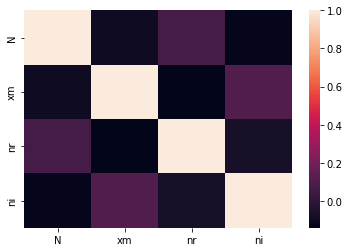

In [116]:
sns.heatmap(new_X.corr())

<AxesSubplot:>

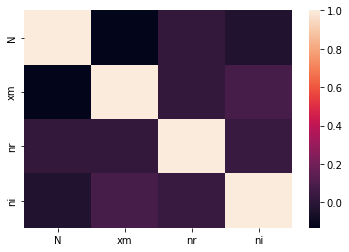

In [117]:
sns.heatmap(X.corr())

In [48]:
evaluate(new_df, df)

C:\Users\kurt_\Anaconda3\lib\site-packages\sdmetrics\column_pairs\statistical\kl_divergence.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_data[pd.isna(real_data)] = 0.0
C:\Users\kurt_\Anaconda3\lib\site-packages\pandas\core\frame.py:3718: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)
C:\Users\kurt_\Anaconda3\lib\site-packages\sdmetrics\column_pairs\statistical\kl_divergence.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.5018154521026624

<AxesSubplot:xlabel='N', ylabel='p1'>

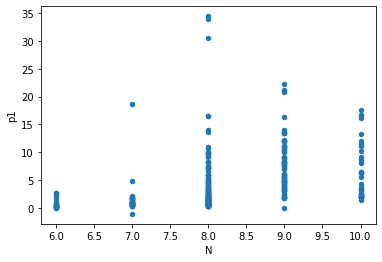

In [69]:
df.plot('N','p1', kind='scatter')

<AxesSubplot:xlabel='N', ylabel='p1'>

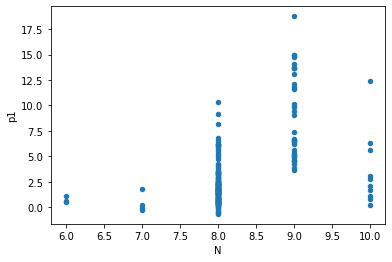

In [70]:
new_df.plot('N','p1', kind='scatter')

<AxesSubplot:xlabel='p1', ylabel='p2'>

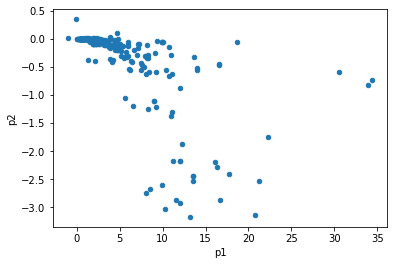

In [71]:
df.plot('p1','p2', kind='scatter')

<AxesSubplot:xlabel='p1', ylabel='p2'>

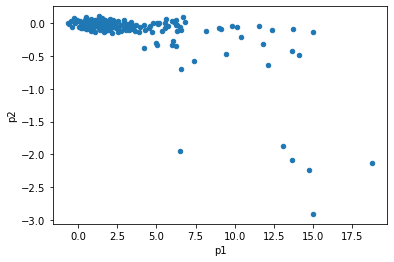

In [72]:
new_df.plot('p1','p2', kind='scatter')

In [74]:
df.describe()

,N,xm,nr,ni,p1,p2,p3
count,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000
mean,8.210332,0.589952,1.676790,0.053295,4.672113,-0.327213,-0.147662
std,1.027422,0.187774,0.249353,0.091053,5.376686,0.694810,0.207597
min,6.000000,0.168000,1.300000,0.001000,-1.057181,-3.172662,-0.961739
25%,8.000000,0.430000,1.450000,0.023000,1.108220,-0.289836,-0.217225
50%,8.000000,0.600000,1.680000,0.023000,2.619269,-0.033590,-0.049511
75%,9.000000,0.665000,1.880000,0.052500,6.356568,-0.000906,-0.005104
max,10.000000,0.960000,2.300000,1.138000,34.415730,0.348434,0.223650


In [75]:
new_df.describe()

,N,xm,nr,ni,p1,p2,p3
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,8.220000,0.534800,1.651500,0.022540,3.272906,-0.121641,-0.115273
std,0.635309,0.176653,0.142729,0.011067,3.603027,0.388199,0.170920
min,6.000000,0.232000,1.300000,0.001000,-0.655654,-2.907514,-0.713956
25%,8.000000,0.396750,1.620000,0.013000,0.953886,-0.088311,-0.149842
50%,8.000000,0.480500,1.690000,0.023000,1.939283,-0.035538,-0.036080
75%,8.000000,0.630000,1.730000,0.030000,4.330345,0.001335,-0.016008
max,10.000000,0.960000,2.050000,0.047000,18.768982,0.106025,0.043514


Gausian Copula model

In [83]:
model = GaussianCopula()
model.fit(df)

C:\Users\kurt_\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:5320: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
C:\Users\kurt_\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
C:\Users\kurt_\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\kurt_\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\kurt_\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:5311: RuntimeWarning: divide by zero encountered in power
  return cd2*x**(c-1)
C:\Users\kurt_\Anaconda3\lib\site-packages\scipy\stats\_continuous_distn

In [84]:
 new_df = model.sample(num_rows=200)

<AxesSubplot:>

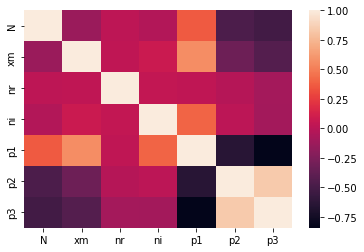

In [85]:
sns.heatmap(df.corr())

<AxesSubplot:>

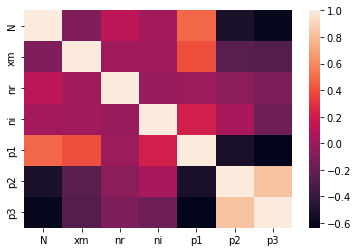

In [86]:
sns.heatmap(new_df.corr())

## Synthethic data evaluation

In [88]:
evaluate(new_df, df)

C:\Users\kurt_\Anaconda3\lib\site-packages\sdmetrics\column_pairs\statistical\kl_divergence.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_data[pd.isna(real_data)] = 0.0
C:\Users\kurt_\Anaconda3\lib\site-packages\pandas\core\frame.py:3718: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)
C:\Users\kurt_\Anaconda3\lib\site-packages\sdmetrics\column_pairs\statistical\kl_divergence.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.49382334295876856